<a href="https://colab.research.google.com/github/barrosfabio/covid-sp/blob/master/COVID_19__Holdout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# No resampling applied

## Import Libraries


In [5]:
import pandas as pd
import numpy as np
import io
from google.colab import files

## Load Dataset from CSV

In [6]:
uploaded = files.upload()
file_name = 'rydls-20.csv'

data_frame = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving rydls-20.csv to rydls-20 (1).csv


## Showing the first rows of the DataFrame

In [7]:
data_frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,class
0,0.072809,0.014345,0.006034,0.020180,0.006107,0.014252,0.003937,0.013483,0.003852,0.006393,0.008368,0.008652,0.008720,0.008194,0.006515,0.004889,0.005165,0.009534,0.009362,0.012887,0.008406,0.013560,0.009410,0.009302,0.004591,0.010149,0.017789,0.016351,0.013552,0.015281,0.016935,0.016594,0.009489,0.009269,0.007291,0.017842,0.009317,0.016312,0.009894,0.018292,0.007159,0.006262,0.006883,0.008234,0.010594,0.011077,0.011282,0.010180,0.008145,0.009356,0.009901,0.009625,0.010530,0.014198,0.014798,0.014034,0.010247,0.107102,0.227089,R/Normal
1,0.043542,0.011730,0.003745,0.015043,0.003440,0.011788,0.002685,0.011306,0.002513,0.006881,0.008379,0.008984,0.008478,0.008424,0.006878,0.005988,0.005848,0.013752,0.010190,0.017387,0.009387,0.017824,0.009586,0.013857,0.005955,0.013887,0.021323,0.020529,0.020257,0.020690,0.020899,0.020099,0.013848,0.015365,0.008993,0.027528,0.011026,0.026060,0.011209,0.026949,0.009333,0.008575,0.008880,0.010474,0.012885,0.013841,0.013530,0.012867,0.010752,0.011715,0.006793,0.011761,0.007203,0.017352,0.009293,0.016485,0.007120,0.097605,0.171286,R/Normal
2,0.071279,0.014877,0.006560,0.017646,0.006254,0.014346,0.004456,0.013391,0.004473,0.007513,0.008530,0.008446,0.008516,0.008298,0.006972,0.005694,0.005715,0.010294,0.011007,0.011644,0.009549,0.011907,0.009169,0.009920,0.005866,0.011455,0.018371,0.015700,0.017103,0.016701,0.016224,0.016045,0.012182,0.010624,0.008025,0.019637,0.008877,0.017608,0.009360,0.017675,0.007999,0.006962,0.007003,0.009243,0.010670,0.010708,0.010512,0.010459,0.008484,0.010188,0.009459,0.009973,0.010978,0.013601,0.013020,0.013156,0.010428,0.101198,0.218051,R/Normal
3,0.049222,0.012391,0.003693,0.018368,0.004072,0.013292,0.002289,0.010716,0.002294,0.005718,0.008029,0.008868,0.009307,0.008707,0.005816,0.004121,0.004297,0.010484,0.008018,0.018835,0.009245,0.020736,0.007919,0.010994,0.003617,0.009873,0.017362,0.020393,0.020377,0.020044,0.020689,0.017012,0.009470,0.010174,0.006956,0.024293,0.011477,0.026839,0.012699,0.024513,0.007163,0.006687,0.006430,0.008910,0.012701,0.013602,0.014970,0.014144,0.008770,0.011226,0.006506,0.010812,0.007444,0.017831,0.011454,0.019233,0.008078,0.104116,0.196702,R/Normal
4,0.063655,0.013284,0.005371,0.016549,0.005759,0.012960,0.004175,0.014134,0.004475,0.007787,0.007871,0.008191,0.008849,0.008256,0.007086,0.006339,0.006744,0.011495,0.011374,0.013069,0.009604,0.014168,0.009941,0.010768,0.006593,0.013135,0.022979,0.018434,0.019643,0.018583,0.018440,0.017995,0.013663,0.012664,0.008511,0.021880,0.009568,0.018673,0.010305,0.018897,0.008163,0.008237,0.008425,0.009685,0.009862,0.010162,0.010867,0.010242,0.008628,0.010242,0.010136,0.010862,0.009643,0.011929,0.011885,0.012872,0.009437,0.093843,0.203014,R/Normal


## Showing the distinct classes that this dataset has

In [9]:
unique_classes = np.unique(data_frame['class'])
print(unique_classes)

['R/Normal' 'R/Pneumonia/Acelular/Viral/Coronavirus/COVID-19'
 'R/Pneumonia/Acelular/Viral/Coronavirus/MERS'
 'R/Pneumonia/Acelular/Viral/Coronavirus/SARS'
 'R/Pneumonia/Acelular/Viral/Varicella'
 'R/Pneumonia/Celular/Bacterial/Streptococcus'
 'R/Pneumonia/Celular/Fungus/Pneumocystis']


## Splitting the inputs and outputs of the dataset

In [11]:
inputs = data_frame.iloc[:,:-1]
outputs = data_frame.iloc[:,-1]

## Split the dataset in training and testing 

In [41]:
from sklearn.model_selection import train_test_split


inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size = 0.2, random_state=42) 


## Showing the class distribution of the dataset

In [88]:
import collections 
count_result = collections.Counter(outputs_train)

for data_class, count_value in count_result.items():
  print('{} - {}'.format(data_class,count_value))


R/Normal - 796
R/Pneumonia/Acelular/Viral/Coronavirus/SARS - 9
R/Pneumonia/Acelular/Viral/Coronavirus/COVID-19 - 74
R/Pneumonia/Acelular/Viral/Coronavirus/MERS - 8
R/Pneumonia/Celular/Fungus/Pneumocystis - 9
R/Pneumonia/Celular/Bacterial/Streptococcus - 9
R/Pneumonia/Acelular/Viral/Varicella - 9


## Instantiate a classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

## Train and predict from data


In [45]:
# Function used to train the classifier
classifier.fit(inputs_train,outputs_train)

# Function used to predict based on the test data
predictions = classifier.predict(inputs_test)
print(predictions)

['R/Normal' 'R/Pneumonia/Acelular/Viral/Coronavirus/COVID-19' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Pneumonia/Acelular/Viral/Coronavirus/COVID-19' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Pneumonia/Acelular/Viral/Coronavirus/COVID-19' 'R/Normal' 'R/Normal'

## Now we need to compare the output from our classifier with the expected output

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(outputs_test, predictions)
precision = precision_score(outputs_test, predictions, average='micro')
recall = recall_score(outputs_test, predictions, average='micro')
f1 = f1_score(outputs_test, predictions, average='micro')

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1-Score: {}'.format(f1))

Accuracy: 0.9213973799126638
Precision: 0.9213973799126638
Recall: 0.9213973799126638
F1-Score: 0.9213973799126638


## Let's take a look at the confusion matrix


In [54]:
import itertools
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(output_test, predicted, uniqueClass):
  title='ConfusionMatrix'
  normalize = False

  cm = confusion_matrix(output_test, predicted)

  plt.rcParams.update({'font.size': 16})
  plt.figure(figsize=(20,20))

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  else:
      cm = cm.astype('int32')

  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(uniqueClass))
  plt.xticks(tick_marks, uniqueClass, rotation=90)
  plt.yticks(tick_marks, uniqueClass)


  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show(block=False)
  plt.close()

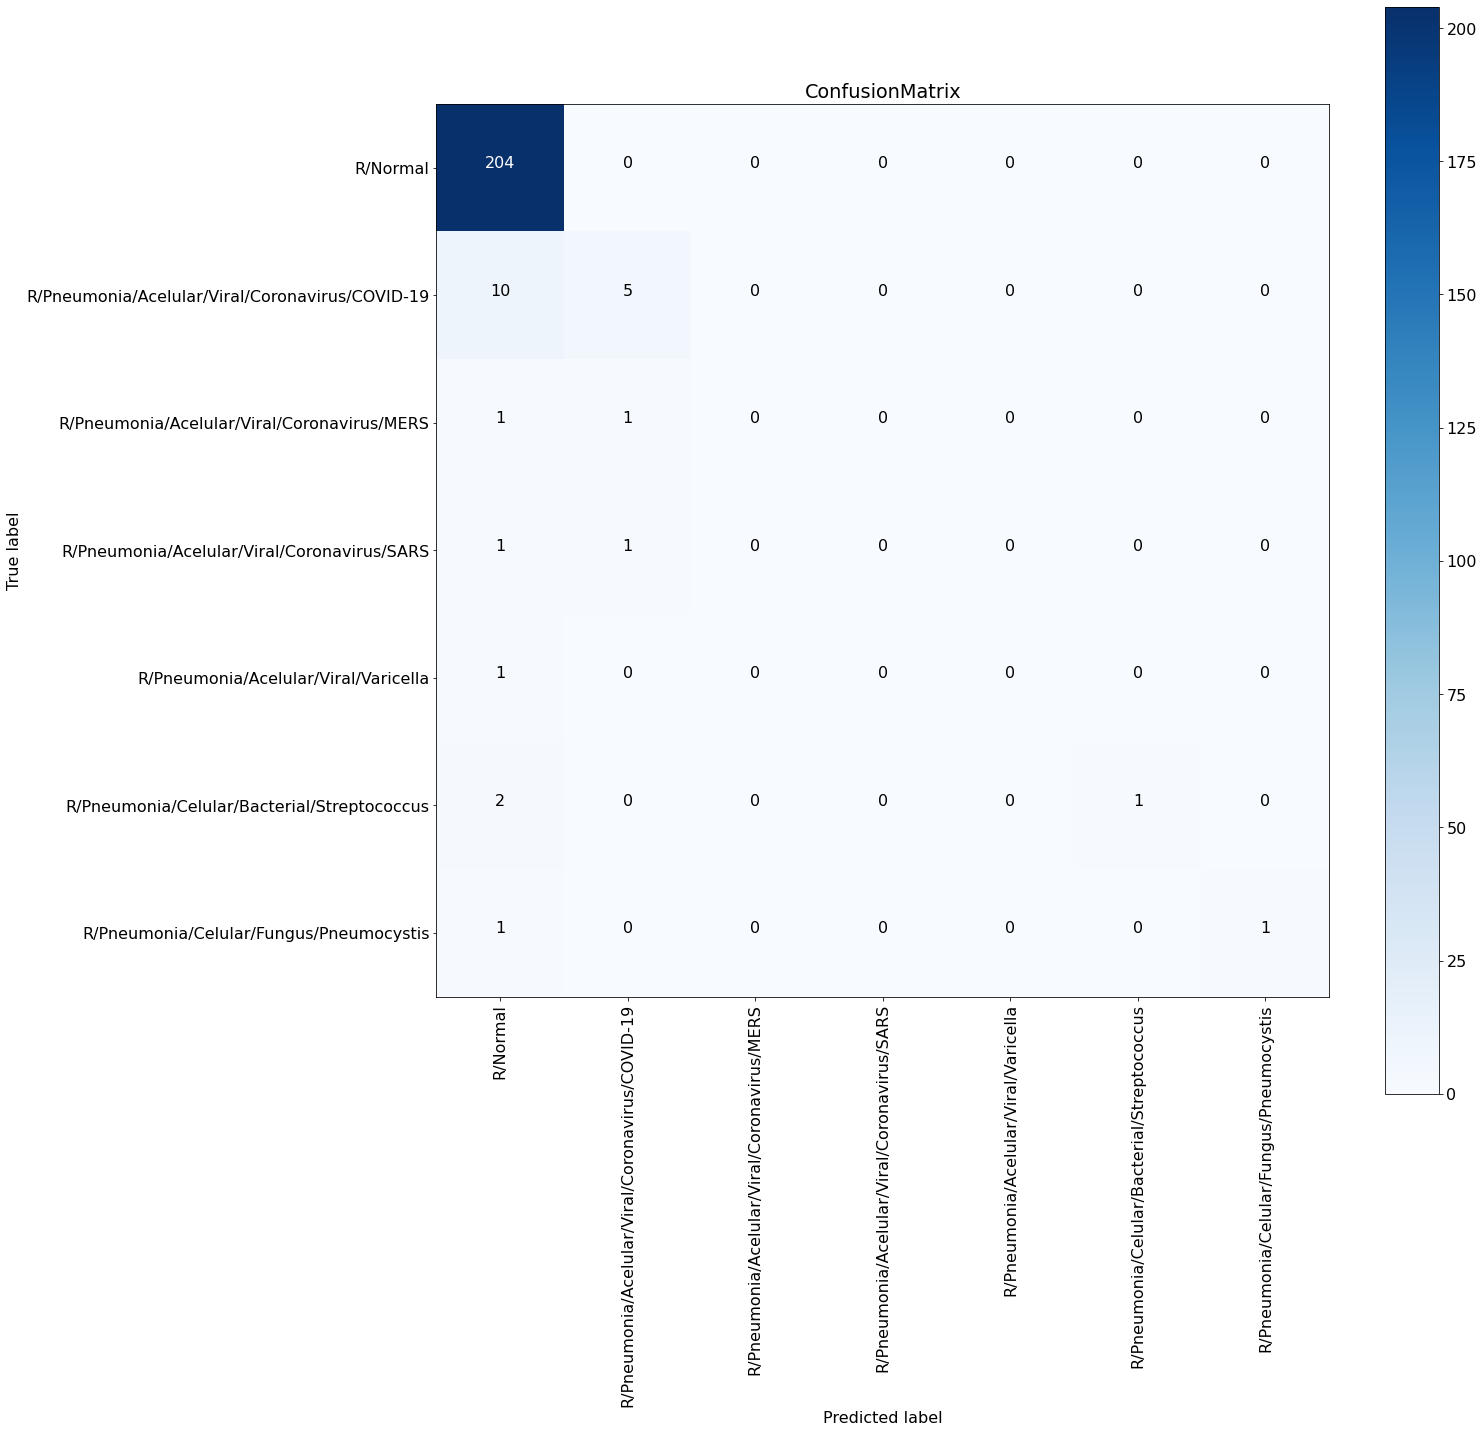

In [55]:
plot_confusion_matrix(output_test=outputs_test, predicted=predictions, uniqueClass=unique_classes)

# After applying SMOTE resampling

## Splitting the original dataframe in inputs/outputs

In [79]:
inputs = data_frame.iloc[:,:-1]
outputs = data_frame.iloc[:,-1]

## Splitting the new resampled data in train/test

In [80]:
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

## Showing the original class distribution


In [87]:
import collections 
count_result = collections.Counter(outputs_train)

for data_class, count_value in count_result.items():
  print('{} - {}'.format(data_class,count_value))

R/Normal - 796
R/Pneumonia/Acelular/Viral/Coronavirus/SARS - 9
R/Pneumonia/Acelular/Viral/Coronavirus/COVID-19 - 74
R/Pneumonia/Acelular/Viral/Coronavirus/MERS - 8
R/Pneumonia/Celular/Fungus/Pneumocystis - 9
R/Pneumonia/Celular/Bacterial/Streptococcus - 9
R/Pneumonia/Acelular/Viral/Varicella - 9


## Apply the resampling algorithm to the TESTING data

IMPORTANT: Remember, you CAN'T resample the test data, otherwise your result will be biased

In [81]:
from imblearn.over_sampling import SMOTE




resampler = SMOTE(random_state=42)
inputs_resampled, outputs_resampled = resampler.fit_resample(inputs_train, outputs_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

## Showing the new data distribution (after resampling

In [82]:
import collections 
count_result = collections.Counter(outputs_resampled)

for data_class, count_value in count_result.items():
  print('{} - {}'.format(data_class,count_value))

R/Normal - 796
R/Pneumonia/Acelular/Viral/Coronavirus/SARS - 796
R/Pneumonia/Acelular/Viral/Coronavirus/COVID-19 - 796
R/Pneumonia/Acelular/Viral/Coronavirus/MERS - 796
R/Pneumonia/Celular/Fungus/Pneumocystis - 796
R/Pneumonia/Celular/Bacterial/Streptococcus - 796
R/Pneumonia/Acelular/Viral/Varicella - 796


## Instantiate a new classifier

In [83]:
classifier = KNeighborsClassifier()

## Using the new resampled data in train/predict 

In [84]:
classifier.fit(inputs_resampled, outputs_resampled)

resampled_predictions = classifier.predict(inputs_test)
print(resampled_predictions)

['R/Normal' 'R/Pneumonia/Acelular/Viral/Coronavirus/COVID-19' 'R/Normal'
 'R/Pneumonia/Celular/Fungus/Pneumocystis' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Pneumonia/Acelular/Viral/Varicella' 'R/Normal'
 'R/Pneumonia/Acelular/Viral/Coronavirus/COVID-19'
 'R/Pneumonia/Celular/Bacterial/Streptococcus' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Pneumonia/Acelular/Viral/Coronavirus/COVID-19' 'R/Normal'
 'R/Pneumonia/Celular/Fungus/Pneumocystis' 'R/Normal' 'R/Normal'
 'R/Pneumonia/Acelular/Viral/Coronavirus/MERS' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Pneumonia/Acelular/Viral/Coronavirus/SARS' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Pneumonia/Acelular/Viral/Coronavirus/COVID-19'
 'R/Pneumonia/Celular/Bacterial/Streptococcus' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Pneumonia/Acelular/Viral/Coronavirus/COVID-19' 'R/Normal' 'R/Normal'
 'R/Normal' 'R/Normal' 'R/Normal'
 'R/Pneumonia/Celula

## Compare the output from our classifier with the expected values 

In [85]:
accuracy = accuracy_score(outputs_test, resampled_predictions)
precision = precision_score(outputs_test, resampled_predictions, average='micro')
recall = recall_score(outputs_test, resampled_predictions, average='micro')
f1 = f1_score(outputs_test, resampled_predictions, average='micro')

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1-Score: {}'.format(f1))

Accuracy: 0.8820960698689956
Precision: 0.8820960698689956
Recall: 0.8820960698689956
F1-Score: 0.8820960698689956


## Plotting the confusion matrix for the resampled example

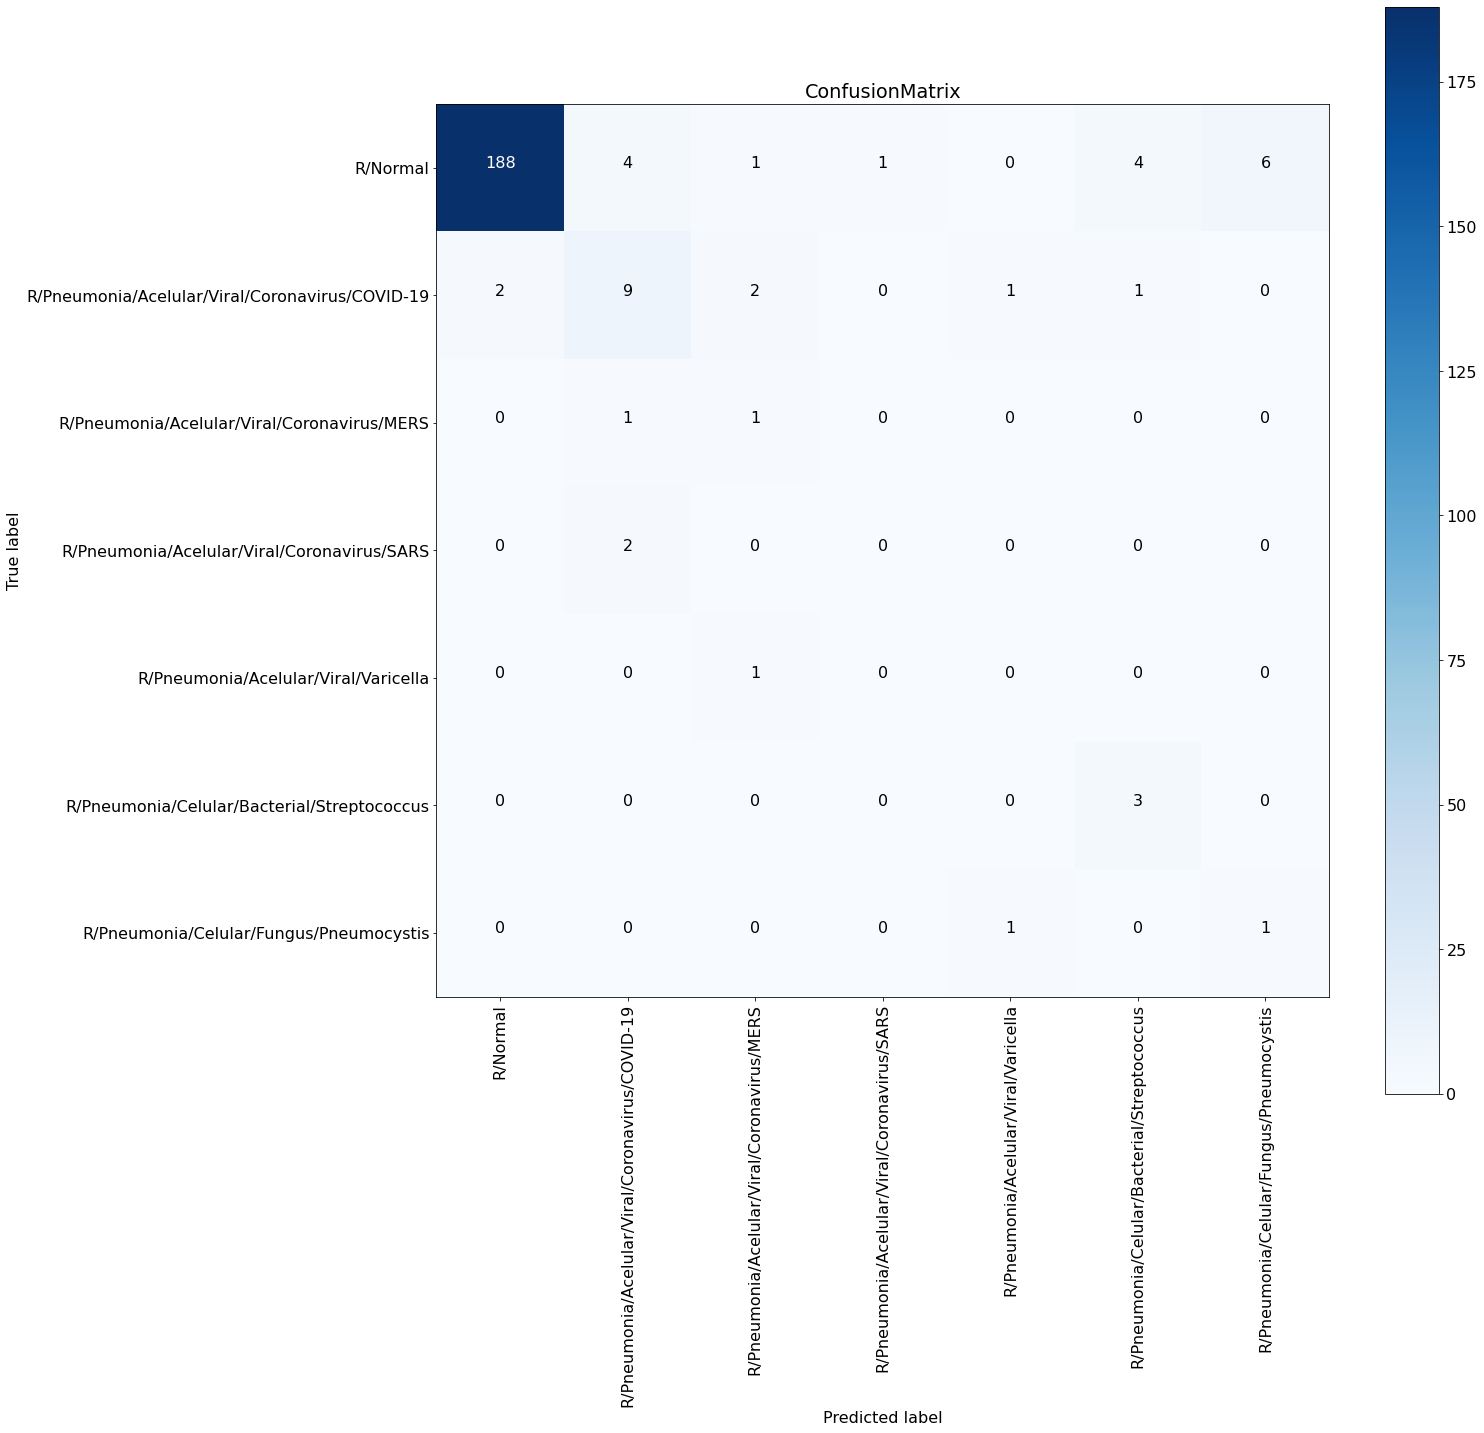

In [86]:
plot_confusion_matrix(outputs_test, resampled_predictions, unique_classes)